## Neural Networks


### Creating a neural network

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np # Helper Libraries
import matplotlib.pyplot as plt

#### Loading the dataset and Data Processing

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 6s 1us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

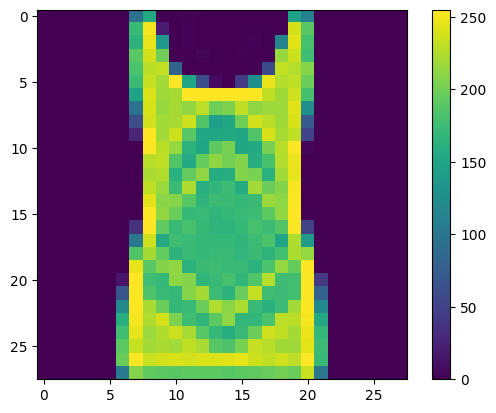

In [7]:
plt.figure()
plt.imshow(train_images[64])
plt.colorbar()
plt.grid(False)
plt.show()

##### Data Preprocessing
Processing the data since we need to scale our pixel values between(0-225) to be between 0 and 1. 

This is done by dividing training and test image data by 255.0 since it makes it easier for the model to process our values.

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### Building the model

Done easily by using the ```model.sequential ``` since the data flows from the left to the right of the model

The Input layer is then created and the ```.Flatten``` is used to flatten the model into the given input size

The Hidden layers are then made. The ```.Dense``` is used since all the current layer nodes are connected to all the previous layer nodes and activation value is determined eg: ```activation='relu'```


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation ='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

#### Compile the Model

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(['accuracy']))

#### Training and evaluating the Model

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4972 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3756 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3374 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3105 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2785 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2694 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2591 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2488 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.24

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3494 - accuracy: 0.8805
Test accuracy: 0.8805000185966492


#### Making Predictions


In [17]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [18]:
test_images.shape

(10000, 28, 28)

In [19]:
predictions[0]

array([4.53849361e-06, 2.98133429e-08, 1.02359756e-07, 4.58067646e-08,
       1.02641718e-06, 2.25098105e-03, 3.21475504e-08, 2.63556261e-02,
       2.74619332e-08, 9.71387625e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

1/1 [==============================] - 0s 43ms/step


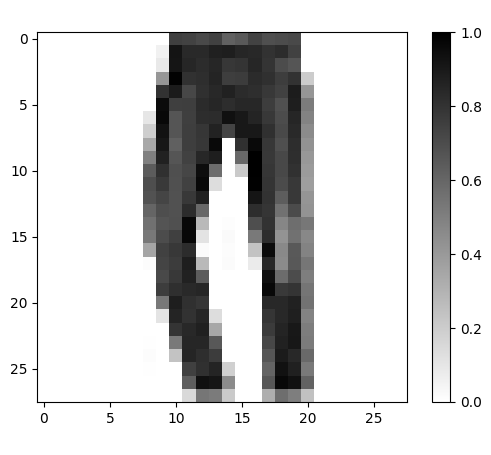

In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
